In [1]:
import rawpy
import numpy as np
import matplotlib.pyplot as plt
import os

def process_dng_to_heatmap(filepath):
    if not os.path.isfile(filepath):
        raise FileNotFoundError(f"File not found: {filepath}")

    # Read DNG using rawpy
    with rawpy.imread(filepath) as raw:
        raw_image = raw.raw_image_visible
        height, width = raw_image.shape

        # Normalize the raw data between 0 and 1
        raw_min = np.min(raw_image)
        raw_max = np.max(raw_image)
        print("Min RAW:", raw_min)
        print("Max RAW:", raw_max)
            
        normalized = (raw_image - raw_min) / (raw_max - raw_min)  # float64 between 0 and 1

        # Print metadata
        print(f"Channels: 1 (grayscale raw image)")
        print(f"Size of each channel: {raw_image.size} pixels")

        # Display heatmap using matplotlib
        plt.imshow(normalized, cmap='viridis', interpolation='nearest')
        plt.colorbar(label='Normalized Intensity (0–1)')
        plt.title("Heatmap")
        plt.axis('off')
        plt.show()

        # Optionally save the heatmap as an image
        heatmap_output_path = os.path.splitext(filepath)[0] + "_heatmap_matplotlib_ALTTTT.png"
        plt.imsave(heatmap_output_path, normalized, cmap='viridis')
        print(f"Saved heatmap to: {heatmap_output_path}")

Min RAW: 940
Max RAW: 16380
Channels: 1 (grayscale raw image)
Size of each channel: 18483200 pixels


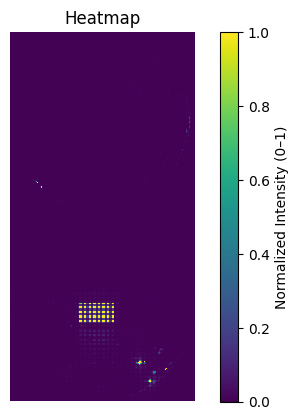

Saved heatmap to: /home/murtaza/Desktop/insta-360/IMG_20250506_172217_00_211_heatmap_matplotlib_ALTTTT.png


In [2]:
filename = '/home/murtaza/Desktop/insta-360/' + 'IMG_20250506_172217_00_211.dng'
process_dng_to_heatmap(filepath=filename)

In [8]:
# Plot histogram of raw pixel values with log-scaled y-axis
def plot_raw_histogram_log(filepath):
    with rawpy.imread(filepath) as raw:
        raw_image = raw.raw_image_visible
        raw_flat = raw_image.flatten()

        # Plot histogram
        plt.figure(figsize=(8, 4))
        plt.hist(raw_flat, bins=512, color='darkgreen', alpha=0.8)
        plt.yscale('log')  # Logarithmic scale for number of pixels
        plt.title("Histogram of Raw Pixel Values (Log Scale)")
        plt.xlabel("Raw Intensity Value")
        plt.ylabel("Number of Pixels (log scale)")
        plt.grid(True, which='both', axis='y')
        plt.tight_layout()
        plt.show()


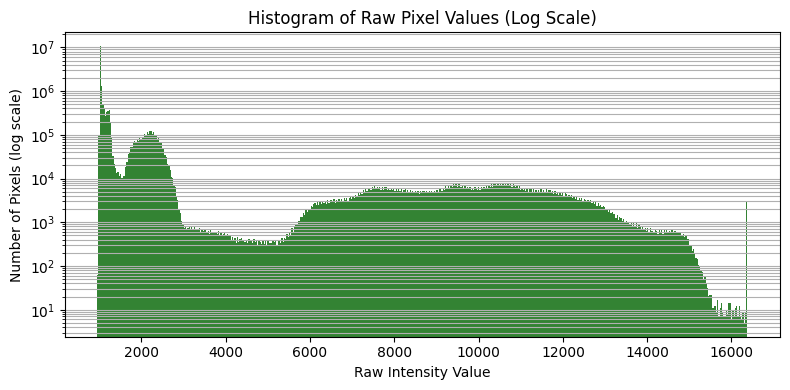

In [9]:
plot_raw_histogram_log(filename)

In [17]:
# Histogram of raw pixel values with ±1σ clipping and log-scaled y-axis
def plot_raw_histogram_log_with_sigma_clip(filepath):
    with rawpy.imread(filepath) as raw:
        raw_image = raw.raw_image_visible
        raw_flat = raw_image.flatten()

        # Compute and print raw value range
        raw_min = np.min(raw_flat)
        raw_max = np.max(raw_flat)
        print(f"Minimum raw value (full): {raw_min}")
        print(f"Maximum raw value (full): {raw_max}")

        # Create histogram data
        counts, bin_edges = np.histogram(raw_flat, bins=512)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        # Compute mean and standard deviation of bin frequencies
        mean_count = np.mean(counts)
        std_count = np.std(counts)

        # ±1σ clipping on frequency
        inlier_mask = (counts >= mean_count - std_count) & (counts <= mean_count + std_count)
        outlier_mask = ~inlier_mask

        # Get min and max raw values from inlier bins
        inlier_bin_edges = bin_edges[:-1][inlier_mask]
        inlier_bin_edges_max = bin_edges[1:][inlier_mask]
        inlier_min_value = np.min(inlier_bin_edges)
        inlier_max_value = np.max(inlier_bin_edges_max)

        # Plotting
        plt.figure(figsize=(10, 5))
        plt.bar(bin_centers[inlier_mask], counts[inlier_mask],
                width=bin_edges[1] - bin_edges[0], color='darkgreen', alpha=0.8, label='Inliers (±1σ)')
        plt.bar(bin_centers[outlier_mask], counts[outlier_mask],
                width=bin_edges[1] - bin_edges[0], color='red', alpha=0.8, label='Outliers')

        plt.yscale('log')
        plt.title("Histogram of Raw Pixel Values (Log Scale, ±1σ Clipping)")
        plt.xlabel("Raw Intensity Value")
        plt.ylabel("Number of Pixels (log scale)")
        plt.legend()
        plt.grid(True, which='both', axis='y')
        plt.tight_layout()
        plt.show()

        # Print stats
        print(f"Mean frequency per bin: {mean_count:.2f}")
        print(f"Standard deviation: {std_count:.2f}")
        print(f"Bins in ±1σ range: {np.sum(inlier_mask)}")
        print(f"Bins outside ±1σ (outliers): {np.sum(outlier_mask)}")
        print(f"Minimum raw value after clipping: {inlier_min_value}")
        print(f"Maximum raw value after clipping: {inlier_max_value}")


Minimum raw value (full): 948
Maximum raw value (full): 16380


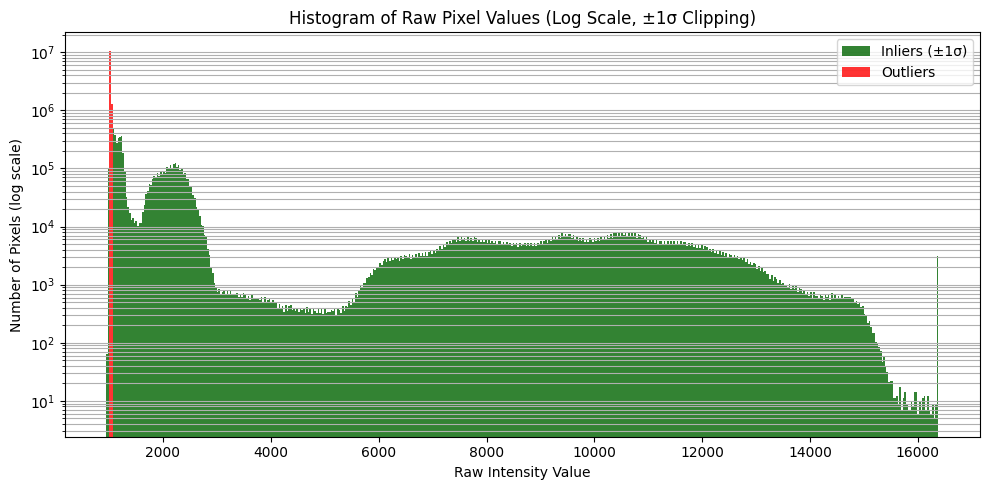

Mean frequency per bin: 36100.00
Standard deviation: 474309.64
Bins in ±1σ range: 510
Bins outside ±1σ (outliers): 2
Minimum raw value after clipping: 948.0
Maximum raw value after clipping: 16380.0


In [18]:
plot_raw_histogram_log_with_sigma_clip(filename)